Populating the interactive namespace from numpy and matplotlib


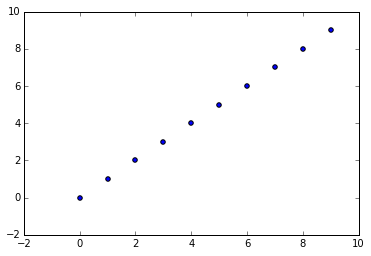

In [6]:
%pylab inline
a = range(0,10)
b = range(0,10)
scatter(a,b)

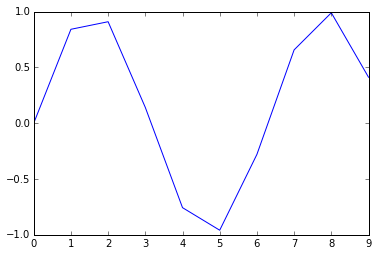

In [7]:
plot(b,sin(b))

In [8]:
c = np.array([1,2,3]) 
0.5*c
vdot(c, c)

14

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 80.03334306  80.13348905  80.03334306 ...,  79.33155289  79.79759547
   80.06418563]
 [ 40.06674453  40.21759197  40.26791638 ...,  39.53110222  39.86493507
   40.09912634]
 ..., 
 [  4.029362     5.68334778   7.32312815 ...,   0.9763713    2.64563797
    4.30829193]
 [  4.01004522   6.83122236   9.63532501 ...,   1.17884505   1.65530162
    4.4853109 ]
 [  4.00086513  13.60963439  23.18438665 ...,  13.60963439   4.00086513
    5.61790421]]


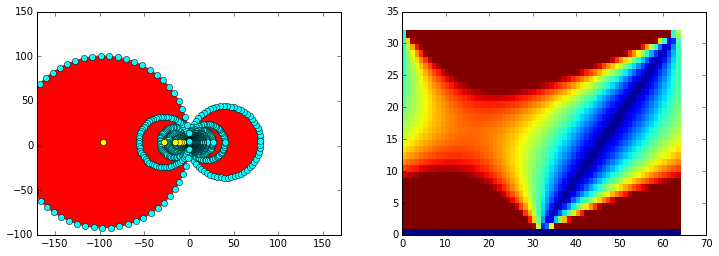

In [28]:
from scipy.spatial import distance
from matplotlib import pyplot as plt

# line segment a given by endpoints a1, a2
# line segment b given by endpoints b1, b2
# return 
def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = np.array([da[1], -da[0]]) #perp(da)
    denom = dot(dap, db)
    num = dot(dap, dp)
    return (num / denom)*db + b1

# initialize variables
A = np.array([0,0])
B = np.array([0,8])
#alpha = pi/2 #frange(0, pi, 0.1) #linspace to specify number of intermediate points
#theta = pi #frange(0, 2*pi, 0.1)
delta = 0.1

alphaLen = len(frange(0, pi, delta))
distancesA = np.zeros((alphaLen, len(frange(0, 2*pi, delta))))
for alphaIndex in range(1, alphaLen): #alpha in frange(0.1, pi, 0.1):#frange(0, pi, 0.1):
#for x in range(1, 2):
    alpha = delta * alphaIndex
    #alpha = frange(0, pi, delta)
    theta = frange(0, 2*pi, delta)
    
    # find third point, C
    distAB = distance.euclidean(A, B)
    distC = (distAB/2) / tan(alpha/2)

    midAB = (A+B) / 2
    dirAB = B - A
    dirAB = dirAB / np.linalg.norm(dirAB)
    dirC = np.array([dirAB[1], -dirAB[0]])

    C = midAB + distC*dirC

    # fit circle between A, B, C
    midAC = (A+C) / 2
    dirAC = C - A
    perpAC = np.array([dirAC[1], -dirAC[0]])

    midBC = (B+C) / 2
    dirBC = B - C
    perpBC = np.array([dirBC[1], -dirBC[0]])

    center = seg_intersect(midAC, midAC+perpAC, midBC, midBC+perpBC)
    radius = distance.euclidean(A, center)
    
    plt.subplot(1, 2, 1)
    circle = plt.Circle(center,radius,color='r')
    ax = plt.gca()
    plt.axis('equal')
    plt.xlim([-10,10])
    ax.add_artist(circle)
    ax.plot(A[0], A[1], 'o', color='black')
    ax.plot(B[0], B[1], 'o', color='black')
    ax.plot(C[0], C[1], 'o', color='black')
    ax.plot(center[0], center[1], 'o', color='yellow')
    
    #ax.plot(midAC[0], midAC[1],'o',color='blue')
    #ax.plot(midAC[0]+perpAC[0], midAC[1]+perpAC[1],'o',color='blue')
    #ax.plot(midBC[0], midBC[1],'o',color='green')
    #ax.plot(midBC[0]+perpBC[0], midBC[1]+perpBC[1],'o',color='green')

    # get corresponding point along circle for given theta
    # theta should be 0 at C
    thetaC = arctan ((C[1]-center[1]) / (C[0]-center[0]))
    P = np.array([center[0] + radius*cos(theta+thetaC), center[1] + radius*sin(theta+thetaC)])
    #print P
    #P = np.rot90(P)
    #print X
    ax.plot(P[0], P[1],'o', color='cyan')

    # calculate distance to A
    distanceA = [distance.euclidean([P[0][i], P[1][i]], A) for i in range(len(theta))]
    #print distanceA
    distancesA[alphaIndex] = distanceA
    
print distancesA
plt.subplot(1, 2, 2)
ax = plt.gca()
fig = plt.gcf()
plSize = fig.get_size_inches()
fig.set_size_inches( (plSize[0]*2, plSize[1]) )
clampDistA = np.clip(distancesA, 0, 10)
ax.pcolor(clampDistA)


In [32]:
A = np.array([0,0])
B = np.array([0,8])

alpha = frange(0.1, pi, delta)
theta = frange(0, 2*pi, delta)

# find third point, C
distAB = distance.euclidean(A, B)
distC = (distAB/2) / tan(alpha/2)

midAB = (A+B) / 2
dirAB = B - A
dirAB = dirAB / np.linalg.norm(dirAB)
dirC = np.array([dirAB[1], -dirAB[0]])

print distAB
print distC
print midAB
print dirAB
print dirC

print size(distC)

#transpose(array([distC,distC]))

#distC = array([distC,distC])

C = midAB + c_[distC,distC]*dirC

midAC = (A+C) / 2
dirAC = C - A
perpAC = np.array([dirAC[1], -dirAC[0]])

midBC = (B+C) / 2
dirBC = B - C
perpBC = np.array([dirBC[1], -dirBC[0]])

print midAC
print dirAC
print perpAC

center = seg_intersect(midAC, midAC+perpAC, midBC, midBC+perpBC)
radius = distance.euclidean(A, center)

8.0
[ 79.93332222  39.86657769  26.46636602  19.7326195   15.66526946
  12.93091258  10.95804864   9.46088968   8.28062945   7.32195089
   6.5241657    5.84678379   5.26174277   4.74896733   4.29370459
   3.8848584    3.51391114   3.17420459   2.86044751   2.56837046
   2.29447879   2.03587242   1.79011209   1.55511828   1.32909367
   1.11046259   0.89782287   0.6899069    0.48554928   0.28365938
   0.0831973 ]
[0 4]
[ 0.  1.]
[ 1. -0.]
31
[[ 39.96666111   2.        ]
 [ 19.93328885   2.        ]
 [ 13.23318301   2.        ]
 [  9.86630975   2.        ]
 [  7.83263473   2.        ]
 [  6.46545629   2.        ]
 [  5.47902432   2.        ]
 [  4.73044484   2.        ]
 [  4.14031472   2.        ]
 [  3.66097544   2.        ]
 [  3.26208285   2.        ]
 [  2.92339189   2.        ]
 [  2.63087138   2.        ]
 [  2.37448366   2.        ]
 [  2.1468523    2.        ]
 [  1.9424292    2.        ]
 [  1.75695557   2.        ]
 [  1.5871023    2.        ]
 [  1.43022376   2.        ]
 [  1

ValueError: operands could not be broadcast together with shapes (31,2) (2,2) 